# DSCI100 FINAL PROJECT

# Introduction
Name: Isabella Lin

**Background:**
- Minecraft, released in 2011 by the Swedish developer Mojang Studios, is a sandbox game that has become iconic among young audiences. As of 2025, it ranks as the third most popular video game worldwide (Wikipedia contributors, 2025).

- This study utilizes data collected by a research group in the UBC Computer Science department, led by Frank Wood. The team operated a dedicated Minecraft server and recorded detailed information on player activity as users interacted within the game environment. The dataset includes variables related to player skill levels, demographics, and gameplay sessions.

  
**Questions:**
- Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- Specific question: Can a player's age and hours played predict whether they will subscribe to the game-related newsletter?



# Data Description of players.csv 

The datafile I used for answering the question was the `players.csv` which had a list of data of all unique players. This dataset contains the necessary variables to answer the question.

- Number of variables: 7
- Number of observations: 195


**ISSUES:**

- The `Age` variable is skewed toward younger players, with most ages clustered around 20. This may indicate a potential bias in the dataset.
- The `played_hours` variable contains many entries with zero hours and very small values. Converting this variable from hours to minutes could provide more meaningful insights in future analyses.
- There are numerous outliers in the `played_hours` data.
- Session counts are imbalanced: some players have participated in many sessions, while others have very few or none.

**Summary Table of `players.csv`**


| variable          | type      | meaning                                                                                                                        | # of missing observations | summary statistics (if applicable)                                             |
|-------------------|-----------|--------------------------------------------------------------------------------------------------------------------------------|--------------------------|--------------------------------------------------------------------------------|
| experience        | character | The level of experience of the player (Beginner (least experienced), Amateur, Regular, Veteran, Pro (most experienced))         | 0                        | N/A                                                                            |
| subscribe         | logical   | Whether subscribed to a game newsletter or not (True, or False)                                                                | 0                        | N/A                                                                            |
| hashedEmail       | character | Private personal Email information                                                                                              | 0                        | N/A                                                                            |
| played_hours      | double    | The number of hours played by the player (hours)                                                                               | 0                        | Max = 223.1, Min = 0, Mean = 5.845918, Standard Deviation = 28.35734           |
| name              | character | The player's name                                                                                                              | 0                        | N/A                                                                            |
| gender            | character | The player's gender (male, female, non-binary, agender, two-spirited, prefer not to say, other)                                | 0                        | N/A                                                                            |
| age               | double    | The player's age (years)                                                                                                       | 2                        | Max = 50, Min = 8, Mean = 20.52062, Median = 19, Mode = 17, SD = 6.174667      |

# Pre-Processing Data and Exploratory Visualization

In [11]:
#1 load the relevant R packages:
library(tidyverse)
library(tidymodels)
library(repr)
library(themis)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [12]:
#2 loads data
minecraft_full<- read_csv("https://raw.githubusercontent.com/Isabella-dsci100/Final-Project-DSCI100/refs/heads/main/players.csv")
head(minecraft_full)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [16]:
#3 wrangles and cleans the data to the format necessary for the planned analysis
minecraft<- minecraft_full|>
                   filter(!is.na(Age))|>
                   mutate(subscribe = as.factor(subscribe))

head(minecraft)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [20]:
#4 Summary statistics (mean values for each numerical variables)
players_average <- minecraft |>
                   summarize(min_played_hours = min(played_hours),
                             max_played_hours = max(played_hours),
                             average_played_hours = mean(played_hours),
                             min_age = min(Age),
                             max_age = max(Age),
                             median_age = median(Age),
                             mode_age = names(which.max(table(minecraft[[7]]))),
                             average_age = mean(Age))
players_average

min_played_hours,max_played_hours,average_played_hours,min_age,max_age,median_age,mode_age,average_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,223.1,5.904639,8,50,19,17,20.52062


**Statistics Interpretation**
- The maximum value for `played_hours` (223.1) is much higher than the average value (5.90), suggesting the presence of outliers in playtime.
- The mode of `age` is 17, likely because the Minecraft server automatically assigns 17 as the default age for each player. This default setting may have influenced the mode.
- The average age is about 20, which is reasonable since most research participants are university students.

In [22]:
#5 splitting into training and testing datasets
set.seed(1)
players_split <- initial_split(minecraft, prop = 0.75, strata = subscribe)

players_training <- training(players_split)
players_testing <- testing(players_split)

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 65 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


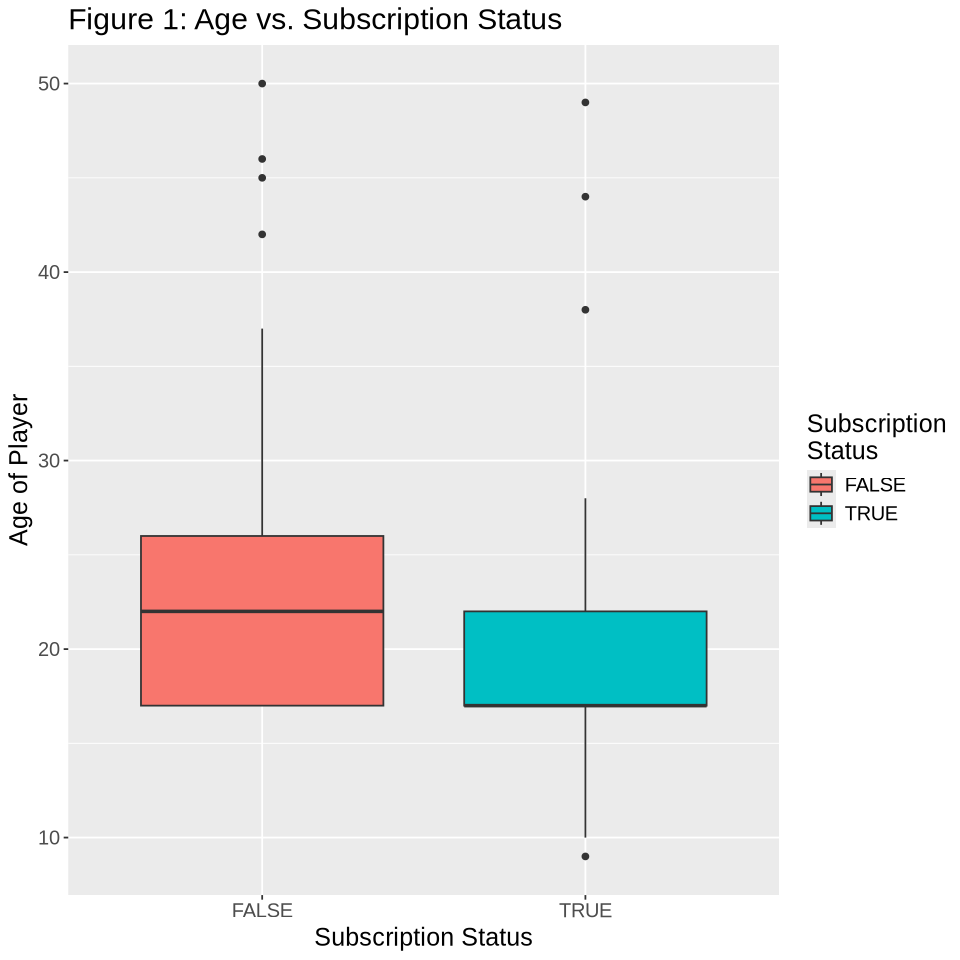

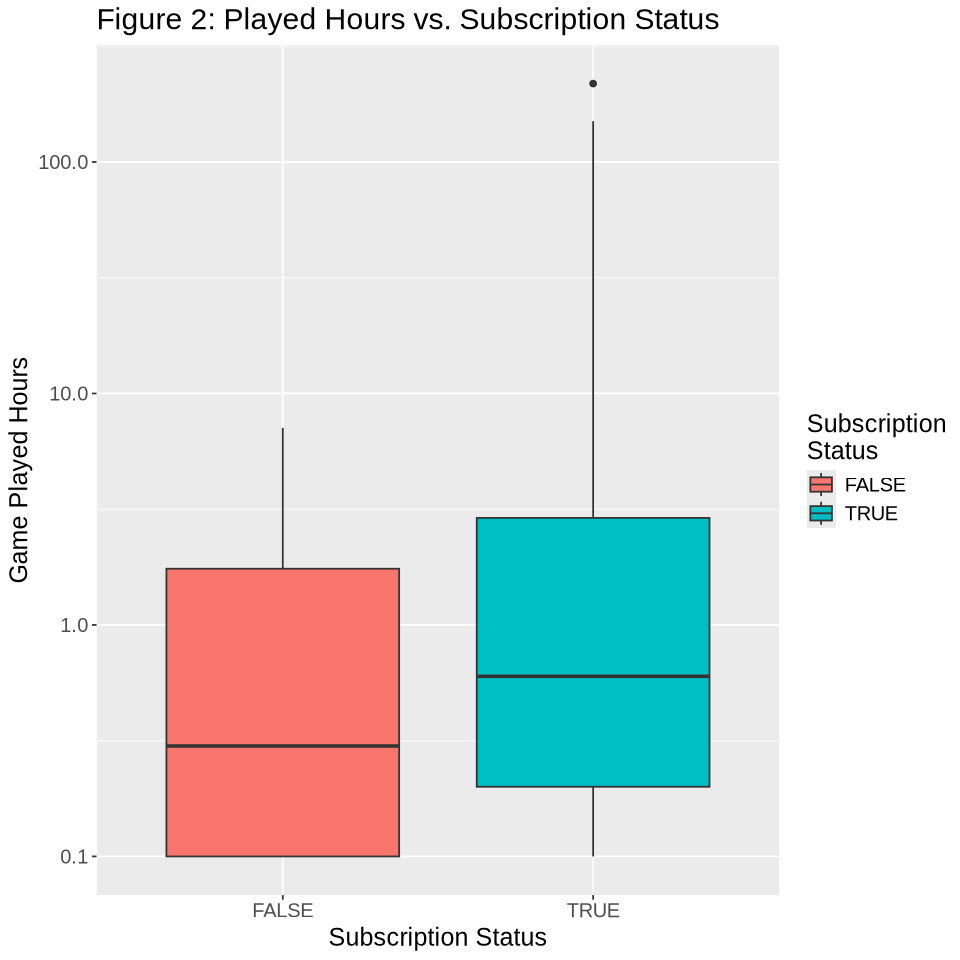

In [28]:
#6 create a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
# finding relationships predictor and variables 
#ie. Age+ Hours players as predictors and subscription status as variable
options(repr.plot.width = 8, repr.plot.height = 8)
Age_boxplot <- ggplot(players_training, aes(x = subscribe, y = Age, fill = subscribe)) +
               geom_boxplot() +
               labs(x= "Subscription Status", y= "Age of Player", fill = "Subscription\nStatus", title = "Figure 1: Age vs. Subscription Status")+
               theme(text = element_text(size = 15))
Age_boxplot

options(repr.plot.width = 8, repr.plot.height = 8)
played_hours_boxplot <- ggplot(players_training, aes(x = subscribe, y = played_hours, fill = subscribe)) +
                        geom_boxplot() +
                        scale_y_log10(labels=label_comma())+
                        labs(x = "Subscription Status", y = "Game Played Hours", fill = "Subscription\nStatus", title = "Figure 2: Played Hours vs. Subscription Status")+
                        theme(text = element_text(size = 15))
played_hours_boxplot

**Plot Descriptions:**

Figure 1.
- This pllot indicates that players who subscribe to game-related newsletters are generally younger, with a median age close to 17, while non-subscribers have a higher median age of about 22. Both groups display a similar range of age variation. Notably, there are four distinct outliers in the non-subscriber group with much higher ages. This pattern suggests that younger players are more inclined to subscribe to game-related newsletters.

Figure 2.
- This graph suggests a potential association between played hours and subscription status. The subscribed group exhibits a higher median number of played hours compared to the unsubscribed group. Additionally, the subscribed group displays greater variability in played hours, including a notably high outlier.

# Methods and Plan

***Method= KNN Classifcation***

**Why Choose This Method?**

Classification is appropriate for this predictive task because it involves using the variables `played_hours` and `Age` to predict the category `subscribe` for new samples. The K-Nearest Neighbors (KNN) algorithm is well-suited here since it does not require strict assumptions about the data distribution or shape. Instead, it classifies new samples based on their proximity to nearby data points.

**Model Application**

Model comparison and selection will be conducted through cross-validation. The `initial_split()` function is used to partition the dataset into 75% training and 25% testing sets, stratified by `subscribe` to maintain class balance. This ensures the testing data remains unseen during model training.

Cross-validation, typically with 5- or 10-folds, will assess the model’s performance, balancing accuracy and computational cost. Tuning the model to find the best K value will help maximize classification accuracy on new observations.

**Potential Limitations**

- KNN is sensitive to feature scaling. If `played_hours` and `Age` have vastly different ranges, Euclidean distance calculations may be biased toward the variable with the larger scale, leading to inaccurate neighbor selection and predictions.
- Class imbalance can affect KNN performance. If there are significantly more subscribed than unsubscribed cases, the model may overclassify new samples as subscribed, reducing prediction accuracy.


# Data Analysis

In [29]:
# 6. Preparing the recipe using only the training data. The data is standardized and upsampled to resolve data imbalance issues. 
players_recipe<- recipe(subscribe~Age+played_hours, data=players_training)|>
step_scale(all_predictors())|>
step_center(all_predictors()) |>
step_upsample(subscribe, over_ratio = 1)

In [30]:
# 7. a) Cross-validation and Parameter (K) Value Selection
players_vfold<- vfold_cv(players_training, v=5, strata=subscribe)
players_spec_tune<- nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

k_vals<- tibble(neighbors=seq(from=1, to=100, by=1))

player_tune_results<- workflow()|>
add_recipe(players_recipe)|>
add_model(players_spec_tune)|>
tune_grid(resamples=players_vfold, grid=k_vals)|>
collect_metrics()

accuracy<- player_tune_results|>
filter(.metric=="accuracy")
     

[1] 89

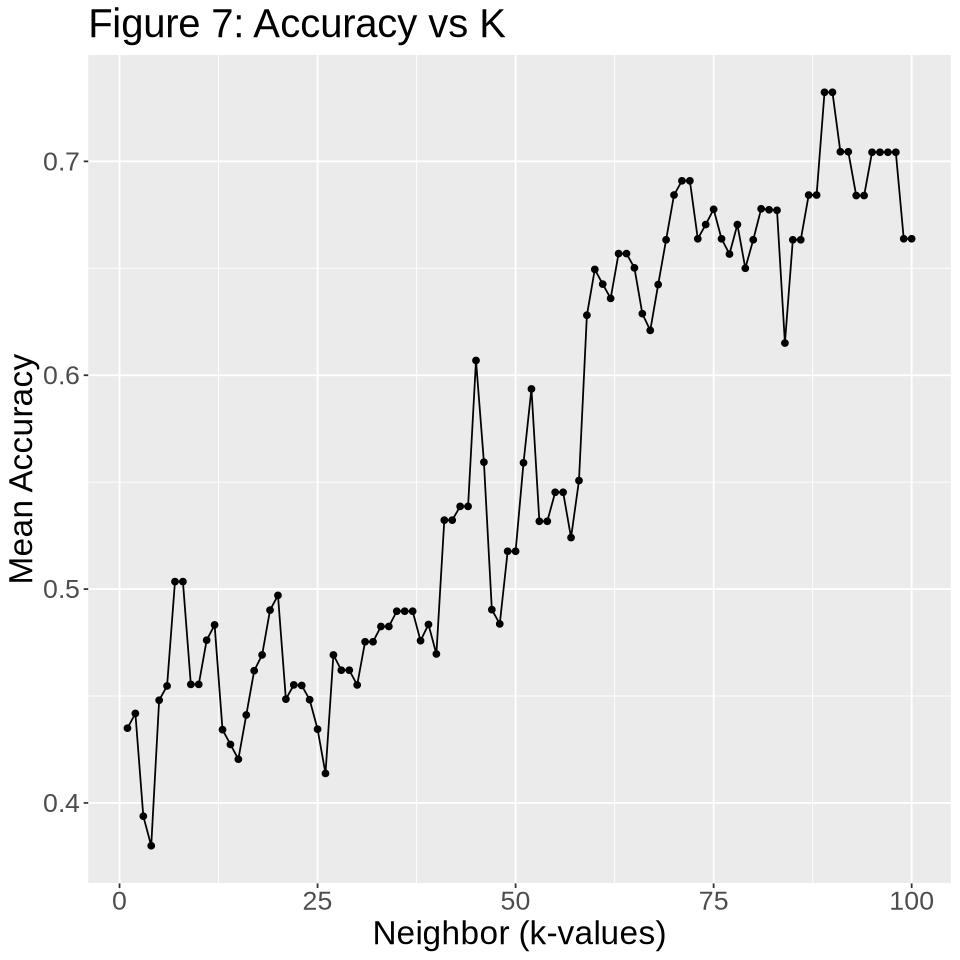

In [31]:
# 8. b) Best K value visualization and determination 
options(repr.plot.width = 8, repr.plot.height = 8)
accuracy_vis_k<- ggplot(accuracy, aes(x=neighbors, y=mean))+
geom_point()+
geom_line() +
labs(x = "Neighbor (k-values)",
     y = "Mean Accuracy",
     title = "Figure 7: Accuracy vs K")+
theme(text = element_text(size = 20))
accuracy_vis_k

best_k_val<- filter(accuracy, mean==max(mean)) |>
filter(neighbors == min(neighbors))|>
pull(neighbors)
best_k_val

# Discussion

# References